In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Driver Vision monitoring and validation/Face'

/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Driver Vision monitoring and validation/Face


In [4]:
size=224

In [5]:
train_path = '/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Driver Vision monitoring and validation/Face'
valid_path = '/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Driver Vision monitoring and validation/Face'

In [ ]:
#import os
#from PIL import Image
#import matplotlib.pyplot as plt

#main_folder_path = '/content/drive/MyDrive/AI base Alzheimer s care and Cognitive Support Mobile App  /Ashen Doc'

#subfolders = [f for f in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, f))]

#for folder in subfolders:
#    folder_path = os.path.join(main_folder_path, folder)
#
 #   image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('jpg', 'jpeg', 'png', 'gif', 'bmp'))]
#
 #   for image_file in image_files:
  #      image_path = os.path.join(folder_path, image_file)
#
 #       image = Image.open(image_path)
  #      plt.imshow(image)
   #     plt.title(image_file)
    #    plt.axis('off')
     #   plt.show()

In [6]:
inception = InceptionV3(input_shape=[size,size] + [3], weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
for layer in inception.layers:
    layer.trainable = False

In [8]:
folders = glob(train_path+'/*')

In [9]:
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 22,007,588 (83.95 MB)

 Trainable params: 204,804 (800.02 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (size, size),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 287 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (size, size),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 287 images belonging to 4 classes.


In [17]:
steps_per_epoch = len(training_set)
validation_steps = len(test_set)

In [20]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=min(len(training_set), 5),
  validation_steps=min(len(test_set), 5)
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 48s 10s/step - accuracy: 0.9386 - loss: 0.3047 - val_accuracy: 0.9688 - val_loss: 0.1636
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 7s/step - accuracy: 0.9490 - loss: 0.4322 - val_accuracy: 0.9764 - val_loss: 0.1690
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 48s 10s/step - accuracy: 0.9632 - loss: 0.1049 - val_accuracy: 0.9438 - val_loss: 0.2329
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 7s/step - accuracy: 0.9411 - loss: 0.2039 - val_accuracy: 0.9213 - val_loss: 0.4989
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 49s 10s/step - accuracy: 0.9597 - loss: 0.3303 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 7s/step - accuracy: 0.9727 - loss: 0.0986 - val_accuracy: 0.9685 - val_loss: 0.0800
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 47s 10s/step - accuracy: 0.9329 - loss: 0.1570 - val_accuracy: 0.9625 - val_loss: 0.1164
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 0.9573 - loss: 0.3007 - val_accuracy: 0.9370 - val_loss: 0.6403
Epoc

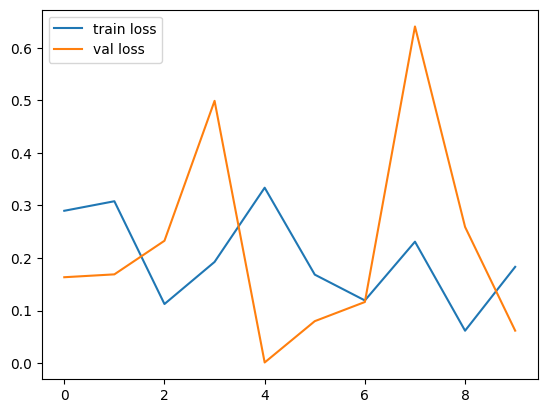

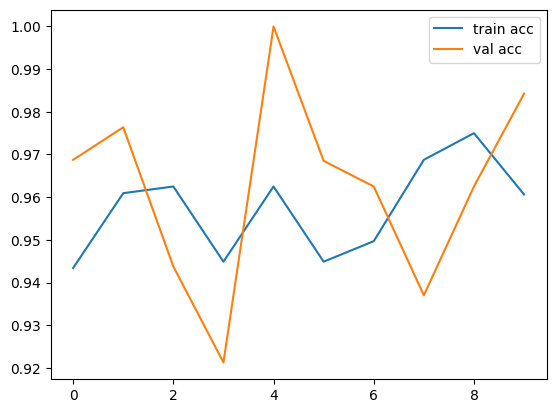

<Figure size 640x480 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
from tensorflow.keras.models import load_model

model.save('sample_model.h5')

In [23]:
y_pred = model.predict(test_set)

9/9 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step


In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
from tensorflow.keras.models import load_model

model=load_model('sample_model.h5')

In [27]:
img=image.load_img('/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Driver Vision monitoring and validation/Face/Sleepy and Yawny/gA_1_s5_ir_face_mp4-154_jpg.rf.3c68670486c8b184514c9fc378992104.jpg',target_size=(size,size))

In [28]:
x=image.img_to_array(img)
x=x/255

In [29]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[0.61751187, 0.02485234, 0.06972897, 0.28790686]], dtype=float32)

In [31]:
np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


array([0])

In [32]:
class_map = training_set.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [33]:
classes

['Drinking while driving',
 'Safe Driving',
 'Sleepy and Yawny',
 'Using Devices while driving']

In [34]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)
    prob = prediction
    print(prob[0])

    index = np.argmax(prediction)
    confidence = prob[0][index]

    if confidence >= 0.9:
        plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='green')
        plt.imshow(img_array)
    else:
        plt.title("Not Detected", size=18, color='red')
        plt.imshow(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
[7.1262884e-10 9.9952424e-01 3.2972576e-08 4.7582871e-04]


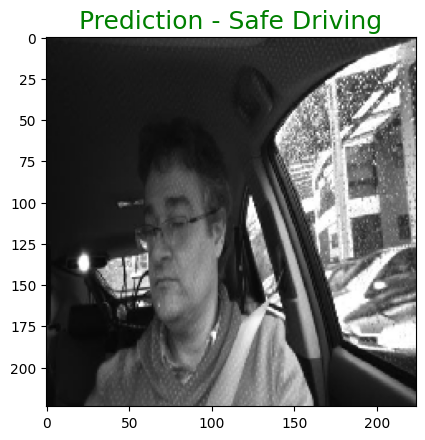

In [35]:
predict_image('/content/drive/MyDrive/Driver Assistant Application(CodeFlex) 🚗 🚏👨🏻‍💻/Driver Vision monitoring and validation/Face/Safe Driving/gA_1_s1_ir_face_mp4-18_jpg.rf.288a30a029dcd5a64a9846de19154ea9.jpg', model)

Saving gB_10_s1_2019-03-11T15-24-54-01-00_ir_face_mp4-187_jpg.rf.4874572fb9e32034c10982721a583855.jpg to gB_10_s1_2019-03-11T15-24-54-01-00_ir_face_mp4-187_jpg.rf.4874572fb9e32034c10982721a583855.jpg
File uploaded: gB_10_s1_2019-03-11T15-24-54-01-00_ir_face_mp4-187_jpg.rf.4874572fb9e32034c10982721a583855.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
[1.0000000e+00 2.3177827e-29 3.6349792e-23 3.3583283e-18]


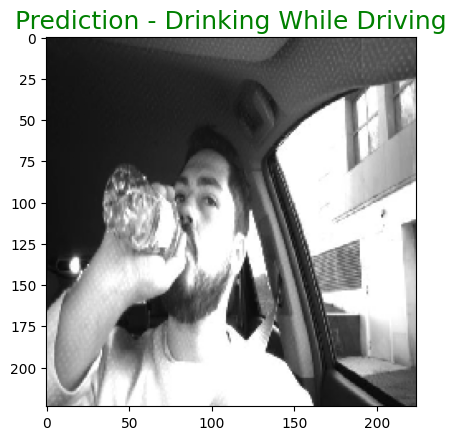

In [36]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'File uploaded: {filename}')
    predict_image(filename, model)